In [275]:
thresh = 0.9518

In [276]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > thresh):   
            self.model.stop_training = True

In [277]:
callbacks = myCallback()

In [278]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2)

In [279]:
import pandas as pd
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import tensorflow as tf
tf.random.set_seed(1)

In [280]:
train = pd.read_csv('/Users/kshitijaupasham/Desktop/fashion-mnist_train.csv')

In [281]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [282]:
y = train.loc[:,'label'] 
X = train.iloc[:,1:]

In [283]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.05)

In [284]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(57000, 784)
(57000,)
(3000, 784)
(3000,)


In [285]:
y_test = pd.get_dummies(y_test)
y_train = pd.get_dummies(y_train)

In [286]:
X_train = X_train/255
X_test = X_test/255

In [287]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [288]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.05,
                             width_shift_range=0.05,
                             height_shift_range=0.05,
                             shear_range=0.05,
                             horizontal_flip=True,
                             fill_mode="nearest")
train_batch =datagen.flow(X_train,y_train,batch_size=32)

In [289]:
steps_per_epoch = int(X_train.shape[0]/32)

In [290]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(32, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(64, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

In [291]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [292]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_52 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 64)      

In [293]:
history = model.fit(train_batch,steps_per_epoch = steps_per_epoch, validation_data=(X_test, y_test), epochs=30,callbacks=[callbacks])

Epoch 1/30
1781/1781 [==============================] - 22s 12ms/step - loss: 0.5783 - accuracy: 0.7910 - val_loss: 0.3694 - val_accuracy: 0.8633
Epoch 2/30
1781/1781 [==============================] - 22s 12ms/step - loss: 0.3846 - accuracy: 0.8590 - val_loss: 0.2589 - val_accuracy: 0.9083
Epoch 3/30
1781/1781 [==============================] - 22s 12ms/step - loss: 0.3387 - accuracy: 0.8774 - val_loss: 0.2713 - val_accuracy: 0.8967
Epoch 4/30
1781/1781 [==============================] - 22s 12ms/step - loss: 0.3083 - accuracy: 0.8890 - val_loss: 0.2237 - val_accuracy: 0.9150
Epoch 5/30
1781/1781 [==============================] - 22s 12ms/step - loss: 0.2880 - accuracy: 0.8953 - val_loss: 0.2102 - val_accuracy: 0.9233
Epoch 6/30
1781/1781 [==============================] - 22s 12ms/step - loss: 0.2705 - accuracy: 0.9018 - val_loss: 0.1990 - val_accuracy: 0.9277
Epoch 7/30
1781/1781 [==============================] - 22s 12ms/step - loss: 0.2564 - accuracy: 0.9065 - val_loss: 0.1994 -

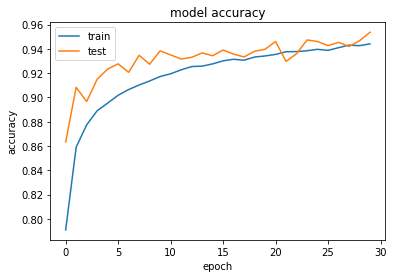

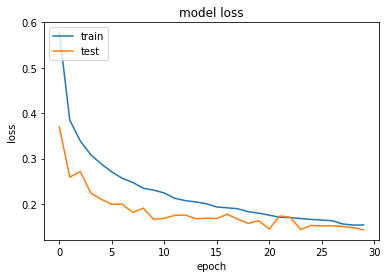

In [294]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [296]:
95.37

95.37